# EDA 

This notebook is just to look through and get a sense of the data. There is also a ScratchPad section for testing.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

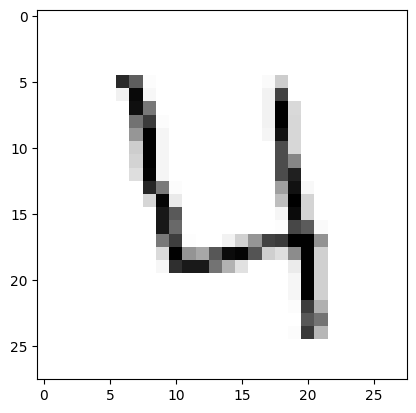

In [4]:
HEIGHT = 28
WIDTH = 28

array = df.iloc[3,1:]
array = np.array(array.values).reshape(HEIGHT, WIDTH)
plt.imshow(array, cmap="Greys")

# Scratch Pad

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, MaxPooling2D, Flatten

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-19 16:17:40.798930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-19 16:17:40.801124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 16:17:40.843802: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 16:17:40.844242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 16:17:41.627947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [6]:
def prep(df, num_classes):
    if 'label' in df.columns:
        y = tf.keras.utils.to_categorical(df.label, num_classes)
        num_images = df.shape[0]
        x_as_array = df.values[:,1:]
        x_shaped_array = x_as_array.reshape(num_images, HEIGHT, WIDTH, 1)
        X = x_shaped_array / 255
        return X, y
        
    else:
        num_images = df.shape[0]
        x_as_array = df.values
        x_shaped_array = x_as_array.reshape(num_images, HEIGHT, WIDTH, 1)
        X = x_shaped_array / 255
        return X    

In [ ]:
X

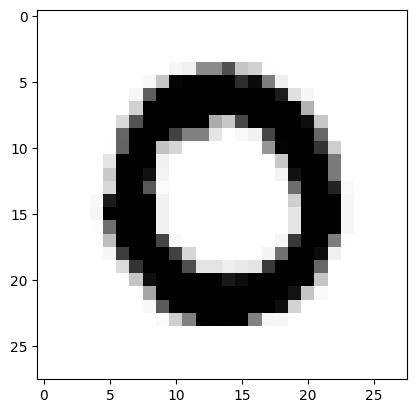

In [7]:
X, y = prep(df, 10)
plt.imshow(X[1], cmap="Greys")

In [8]:
# Now we can build the model and input X as a (42000, 28, 28, 1) input shape
model = Sequential()

model.add(Conv2D(20, 
                 (2,2),
                 activation='relu',
                 input_shape=(HEIGHT, WIDTH, 1)
                 ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(20, 
                 (2,2),
                 activation='relu',
                 input_shape=(HEIGHT, WIDTH, 1)
                 ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 20)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 20)        1620      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 720)               0         
                                                                 
 dense (Dense)               (None, 128)               9

In [9]:
# I'm also going to build a callback that will save the best model per epoch so it can be referenced later
checkpoint_filepath = '../models/best_model.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [11]:
epochs = 150
steps_per_epoch = 10

model.fit(X,
          y,
          batch_size=steps_per_epoch * epochs,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_split=.2,
          callbacks=model_checkpoint_callback
          )

Epoch 1/150
10/10 [==============================] - 1s 102ms/step - loss: 0.0992 - accuracy: 0.9712 - val_loss: 0.0944 - val_accuracy: 0.9705
Epoch 2/150
10/10 [==============================] - 1s 107ms/step - loss: 0.0904 - accuracy: 0.9735 - val_loss: 0.0913 - val_accuracy: 0.9707
Epoch 3/150
10/10 [==============================] - 1s 107ms/step - loss: 0.0877 - accuracy: 0.9749 - val_loss: 0.0891 - val_accuracy: 0.9718
Epoch 4/150
10/10 [==============================] - 1s 111ms/step - loss: 0.0862 - accuracy: 0.9745 - val_loss: 0.0851 - val_accuracy: 0.9726
Epoch 5/150
10/10 [==============================] - 1s 104ms/step - loss: 0.0818 - accuracy: 0.9758 - val_loss: 0.0817 - val_accuracy: 0.9742
Epoch 6/150
10/10 [==============================] - 1s 117ms/step - loss: 0.0768 - accuracy: 0.9775 - val_loss: 0.0794 - val_accuracy: 0.9744
Epoch 7/150
10/10 [==============================] - 1s 104ms/step - loss: 0.0786 - accuracy: 0.9778 - val_loss: 0.0786 - val_accuracy: 0.9746

In [ ]:
history = model.history

best_acc = max(history.history['accuracy'])
print(f'Best accuracy achieved: {best_acc}')
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

Current best model achieved is 98.5% val_accuracy. 

I think by making the first conv layer bigger, it abstracts out more detail up front.
```
model = Sequential()

model.add(Conv2D(20, 
                 (2,2),
                 activation='relu',
                 input_shape=(HEIGHT, WIDTH, 1)
                 ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(40, 
                 (3,3),
                 activation='relu',
                 input_shape=(HEIGHT, WIDTH, 1)
                 ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )
model.summary()
```

Thoughts for improving
1. Augment and generate more training data to train on.
2. Modify hyperparameters

In [12]:
model.load_weights(checkpoint_filepath)

In [13]:
test_df = pd.read_csv('../data/test.csv')

test_X = prep(test_df, num_classes=10)

preds = model.predict(test_X)
preds

875/875 [==============================] - 2s 2ms/step


array([[4.08904918e-14, 1.14766564e-22, 1.00000000e+00, ...,
        3.00432104e-16, 4.69111241e-15, 3.83479245e-17],
       [9.99999404e-01, 1.94475518e-18, 3.07791770e-12, ...,
        1.74846838e-11, 6.02567579e-11, 1.60855496e-10],
       [3.18158090e-15, 1.69980896e-09, 6.81447273e-04, ...,
        7.98565214e-09, 1.04869957e-06, 9.99316454e-01],
       ...,
       [1.75988715e-24, 4.09295914e-21, 4.75036922e-18, ...,
        3.23767880e-18, 1.02077793e-15, 1.45165425e-11],
       [2.18915581e-15, 1.65338290e-14, 6.63040629e-12, ...,
        4.88424632e-07, 7.44732331e-11, 9.91067946e-01],
       [7.76612254e-14, 3.29401352e-18, 1.00000000e+00, ...,
        1.34438571e-14, 2.27979163e-10, 8.24492384e-12]], dtype=float32)

In [14]:
Y_pred_classes = [np.argmax(preds[idx]) for idx, val in enumerate(preds)]
Y_pred_classes 

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 3,


3


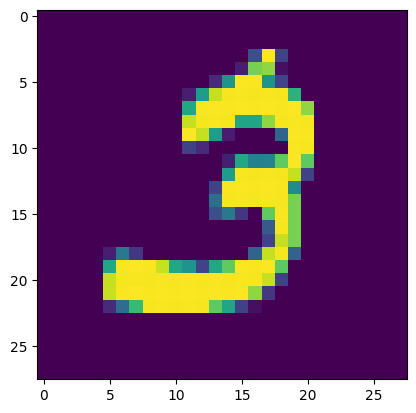

5


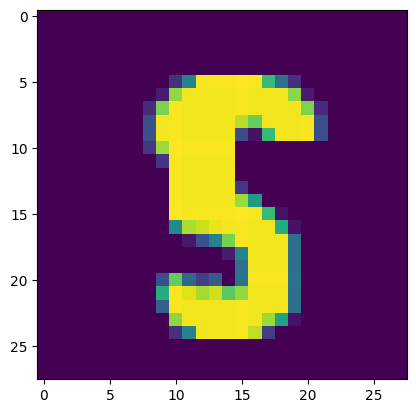

5


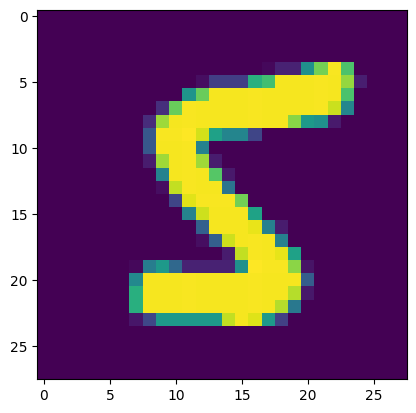

7


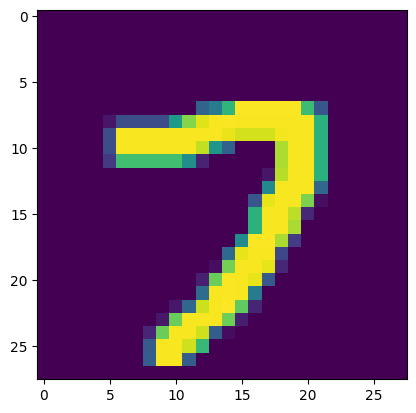

4


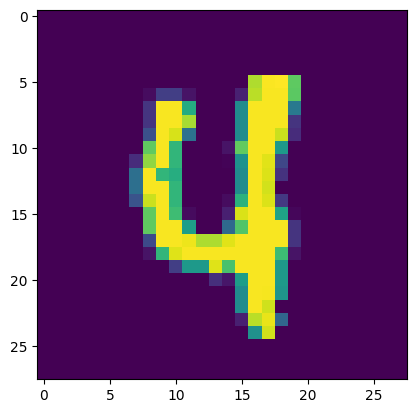

In [15]:
from random import randint

def print_predictions(img_df, preds, number_of_predictions=5):
    r = []
    for i in range(0, number_of_predictions): 
        r.append(randint(0, len(preds)))
    for idx, val in enumerate(r):
        print(preds[val])
        plt.imshow(test_df.loc[val].values.reshape(28,28))
        plt.show()
    
print_predictions(test_df, Y_pred_classes)

In [16]:
submission = pd.DataFrame(enumerate(Y_pred_classes),
                          columns=['ImageId', 'Label']
                          )
submission.ImageId += 1

In [17]:
submission.to_csv('../submission/submission.csv', index=False,index_label='ImageId')